In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_pickle("G:\\My Drive\\Projects\\110_JetscapeMl\\hm.jetscapeml.data\\simulation_results\\jet_ml_benchmark_config_01_to_09_alpha_0.2_0.3_0.4_q0_1.5_2.0_2.5_MMAT_MLBT_size_1000_shuffled.pkl")

type(df)
dataset_x=df[0]
dataset_y=df[1]
dataset_x.shape

(1000, 32, 32)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset_x,dataset_y, test_size=0.2,random_state=25)

In [12]:
print ("x_train",x_train.shape,len(x_train))
print ("x_test",x_test.shape,len(x_test))


x_train (800, 32, 32) 800
x_test (200, 32, 32) 200


In [5]:
x_max=max(x_train.max(),x_test.max())
x_max

86.90838000000002

In [6]:
x_train_flatten=x_train.reshape(len(x_train),32*32)
x_test_flatten=x_test.reshape(len(x_test),32*32)
x_train_scaled=x_train_flatten.copy()
x_test_scaled=x_test_flatten.copy()
x_train_scaled=x_train_scaled/x_max
x_test_scaled=x_test_scaled/x_max

In [ ]:
from sklearn.preprocessing import OneHotEncoder


y_train_0_categorical = np.array(y_train[:,0]).reshape(-1, 1)
y_test_0_categorical = np.array(y_test[:,0]).reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y_train_0_categorical_encoded = encoder.fit_transform(y_train_0_categorical)
y_test_0_categorical_encoded = encoder.transform(y_test_0_categorical)
y_test_0_categorical_encoded

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(2,input_shape=(32*32,),activation='sigmoid',kernel_initializer='ones',bias_initializer='zeros')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')
model.fit(x_train_scaled,y_train_0_categorical_encoded,epochs=500)

In [ ]:
model.evaluate(x_test_scaled,y_test_0_categorical_encoded)

In [ ]:
prediction_array=model.predict(x_test_scaled)
prediction_array,y_test_0_categorical_encoded

Epoch 1/50
800/800 [==============================] - 1s 1ms/step - loss: 0.8820 - accuracy: 0.5663 - val_loss: 0.7791 - val_accuracy: 0.5250
Epoch 2/50
800/800 [==============================] - 1s 1ms/step - loss: 0.6675 - accuracy: 0.6525 - val_loss: 0.9295 - val_accuracy: 0.5200
Epoch 3/50
800/800 [==============================] - 1s 1ms/step - loss: 0.6277 - accuracy: 0.6837 - val_loss: 0.8527 - val_accuracy: 0.5600
Epoch 4/50
800/800 [==============================] - 1s 1ms/step - loss: 0.5175 - accuracy: 0.7337 - val_loss: 0.9569 - val_accuracy: 0.5100
Epoch 5/50
800/800 [==============================] - 1s 1ms/step - loss: 0.5135 - accuracy: 0.7462 - val_loss: 1.0085 - val_accuracy: 0.5150
Epoch 6/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4811 - accuracy: 0.7625 - val_loss: 0.9883 - val_accuracy: 0.5300
Epoch 7/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4420 - accuracy: 0.7700 - val_loss: 1.2169 - val_accuracy: 0.5350
Epoch 

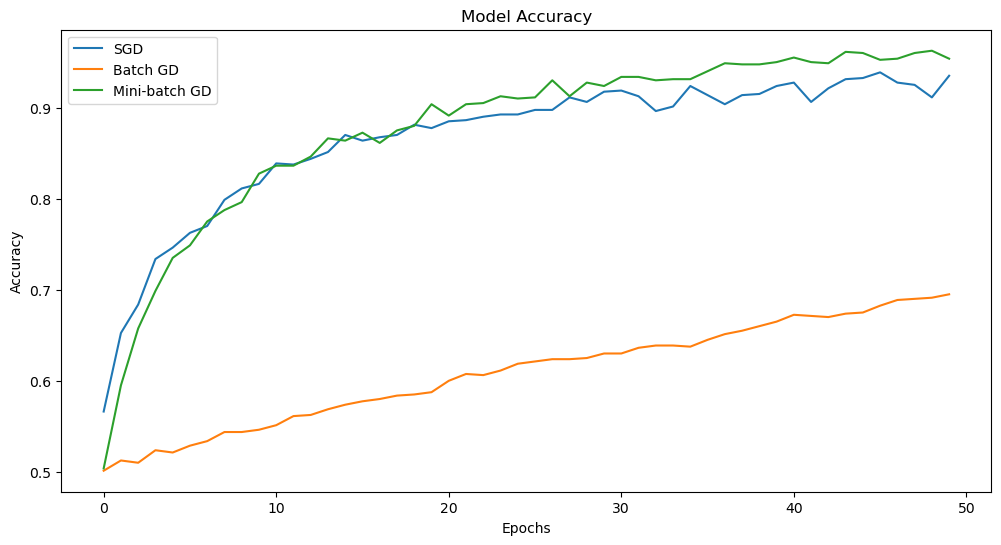

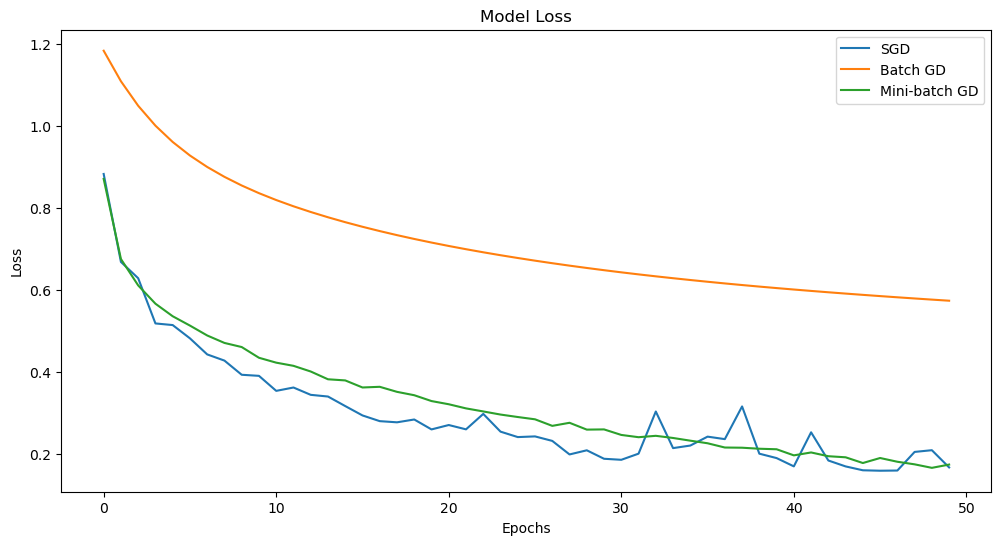

In [16]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Define model architecture
sgd_model=batch_gd_model=mini_batch_gd_mdoel = Sequential([
    Flatten(input_shape=(32, 32)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # 2 output classes
])
batch_gd_model=Sequential([
    Flatten(input_shape=(32, 32)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # 2 output classes
])
mini_batch_gd_mdoel = Sequential([
    Flatten(input_shape=(32, 32)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # 2 output classes
])
# Compile model
sgd_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model with stochastic gradient descent
history_sgd = sgd_model.fit(x_train, y_train_0_categorical_encoded, epochs=50, batch_size=1, validation_data=(x_test, y_test_0_categorical_encoded))

# Compile model
batch_gd_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model with batch gradient descent
history_batch = batch_gd_model.fit(x_train, y_train_0_categorical_encoded, epochs=50, batch_size=len(x_train), validation_data=(x_test, y_test_0_categorical_encoded))

# Compile model
mini_batch_gd_mdoel.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model with mini-batch gradient descent
history_mini_batch = mini_batch_gd_mdoel.fit(x_train, y_train_0_categorical_encoded, epochs=50, batch_size=32, validation_data=(x_test, y_test_0_categorical_encoded))

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_sgd.history['accuracy'], label='SGD')
plt.plot(history_batch.history['accuracy'], label='Batch GD')
plt.plot(history_mini_batch.history['accuracy'], label='Mini-batch GD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history_sgd.history['loss'], label='SGD')
plt.plot(history_batch.history['loss'], label='Batch GD')
plt.plot(history_mini_batch.history['loss'], label='Mini-batch GD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()
